In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

execfile ("_ImportScript.py")

1


In [ ]:
execfile ("_ExploreMocksOneNoiseRezEach.py")

In [7]:
alphas = np.loadtxt("RobustnessAnalysis/alpha_lmax8lmin2nmax2nmin1.txt")

In [14]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

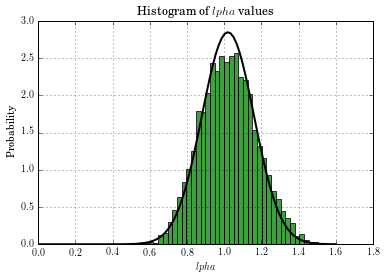

In [80]:
import matplotlib.pyplot as plt
from scipy.stats import norm
n, bins, patches = plt.hist(alphas, 40, normed=1, facecolor='green', alpha=0.75)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel('$\displaystyle\alpha$')
plt.ylabel('Probability')
plt.title('Histogram of $\displaystyle\alpha$ values')

#x = np.linspace(norm.ppf(0.01, loc=1, scale=0.19), norm.ppf(0.99, loc=1,  scale=0.19), 100)
x=np.linspace(0,1.6, 100)
rv = norm()
plt.plot(x, norm.pdf(x, loc=1.02, scale=0.14), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

In [71]:
#Find the best fit mu and sigma for the Gaussian
from scipy.stats import multivariate_normal
# Find the best fit mu and sigma
sigma, mu = np.mgrid[0.14:0.16:.01, 1.0:1.04:.01]
posterior = np.zeros(sigma.shape)
print sigma.shape
for i in range(sigma.shape[0]):
    for j in range(sigma.shape[1]):
        posterior[i, j] = multivariate_normal.pdf(alphas, mu[i, j]*np.ones(alphas.shape), sigma[i, j]*np.diag(np.ones(alphas.shape)))
        print i, j
max_ind = np.argmax(posterior)

(2, 5)
0 0
0 1
0 2
0 3
0 4
1 0
1 1
1 2
1 3
1 4


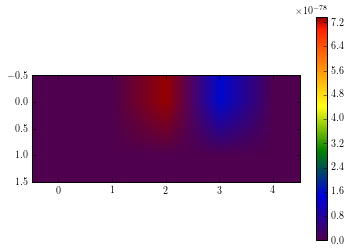

In [72]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(posterior)
plt.colorbar()


In [84]:
print np.argmax(posterior)
print sigma[0,2]
print mu[0,2]


2
0.14
1.02


In [83]:
sum_alpha = 0
for i in range(len(alphas)):
    sum_alpha=sum_alpha+(alphas[i]-1)**2
    
sum_alpha= sum_alpha/len(alphas)

print 'For l_max = ' + str(beatbox.Multiverse.truncated_lmax) + ' and n_max = ' + str(beatbox.Multiverse.truncated_nmax) + ', the alpha recovery success is ' + str(sum_alpha) + '.' 

For l_max = 8 and n_max = 2, the alpha recovery success is 0.0234348783315.
